In [85]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
df = pd.read_csv("correct_twitter_201904.tsv",sep='\t')

In [62]:
df.head(5)


,id,event,ts1,ts2,from_stream,directly_from_stream,from_search,directly_from_search,from_quote_search,directly_from_quote_search,...,retweeted,retweeted_author_id,retweeted_handle,retweeted_follower_count,mentioned_author_ids,mentioned_handles,hashtags,urls,media_keys,place_id
0,1131594960443199488,britney_201904,2022-02-28 09:34:44.627023-05:00,2022-02-28 09:34:44.627023-05:00,True,True,False,False,False,False,...,1.130918e+18,3.042894e+09,Iesbwian,22760.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1131594976750653440,britney_201904,2022-02-28 09:34:44.626921-05:00,2022-02-28 09:34:44.626921-05:00,True,True,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1131589737955942405,britney_201904,2022-02-28 09:34:44.634058-05:00,2022-02-28 09:34:44.634058-05:00,True,True,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1131594909469892610,britney_201904,2022-02-28 09:34:44.627125-05:00,2022-02-28 09:34:44.627125-05:00,True,True,False,False,False,False,...,1.130918e+18,3.042894e+09,Iesbwian,22760.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1131594812694511617,britney_201904,2022-02-28 09:34:44.627227-05:00,2022-02-28 09:34:44.627227-05:00,True,True,False,False,False,False,...,1.130918e+18,3.042894e+09,Iesbwian,22760.0,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
print(df.dtypes)

id                                 int64
event                             object
ts1                               object
 ts2                              object
from_stream                         bool
directly_from_stream                bool
from_search                         bool
directly_from_search                bool
from_quote_search                   bool
directly_from_quote_search          bool
from_convo_search                   bool
directly_from_convo_search          bool
from_timeline_search                bool
directly_from_timeline_search       bool
text                              object
lang                              object
author_id                          int64
author_handle                     object
created_at                        object
conversation_id                    int64
possibly_sensitive                  bool
reply_settings                    object
source                            object
author_follower_count              int64
retweet_count   

In [70]:
# List of columns to drop (modify this based on your actual unused columns)
columns_to_drop = ['urls', 'media_keys','from_stream', 'directly_from_stream','directly_from_stream','from_search' ,                        
'directly_from_search' ,               
'from_quote_search'  ,                 
'directly_from_quote_search' ,          
'from_convo_search'  ,                  
'directly_from_convo_search'  ,         
'from_timeline_search',                 
'directly_from_timeline_search',
'lang',' ts2','author_handle','conversation_id','quoted_handle','quoted_follower_count','retweeted','retweeted_author_id','retweeted_handle','mentioned_handles','mentioned_author_ids',
'quoted_author_id','quoted','replied_to_handle','replied_to_author_id','replied_to','quote_count','author_follower_count','source','reply_settings','possibly_sensitive','ts1']
df_cleaned = df.drop(columns=columns_to_drop)


In [71]:
df_cleaned

,id,event,text,author_id,created_at,retweet_count,reply_count,like_count,replied_to_follower_count,retweeted_follower_count,hashtags,place_id
0,1131594960443199488,britney_201904,RT @Iesbwian: britney spears was right.....my ...,1620294025,2019-05-23 12:17:17-04:00,3949,0,0,NaN,22760.0,NaN,NaN
1,1131594976750653440,britney_201904,TJ trusts me to make a playlsit for our 5 hour...,34706181,2019-05-23 12:17:21-04:00,0,3,1,NaN,NaN,NaN,NaN
2,1131589737955942405,britney_201904,"@badgurlhenri you better work bitch - spears,...",1784620956,2019-05-23 11:56:32-04:00,0,0,1,4002.0,NaN,NaN,NaN
3,1131594909469892610,britney_201904,RT @Iesbwian: britney spears was right.....my ...,3410399002,2019-05-23 12:17:05-04:00,3949,0,0,NaN,22760.0,NaN,NaN
4,1131594812694511617,britney_201904,RT @Iesbwian: britney spears was right.....my ...,1098239071837515781,2019-05-23 12:16:42-04:00,3949,0,0,NaN,22760.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
88032,1122977274352082944,britney_201904,RT @ITSPARISBXTCH: ladies and gentlemen let me...,927328349504065536,2019-04-29 17:33:40-04:00,121,0,0,NaN,13773.0,NaN,NaN
88033,1122977257969127429,britney_201904,RT @keanuorange: Pop stars hairstyles per era:...,1531266667,2019-04-29 17:33:36-04:00,38972,0,0,NaN,1422.0,NaN,NaN
88034,1122977009347518466,britney_201904,can only think about Britney Jean Spears today...,34953086,2019-04-29 17:32:37-04:00,0,0,3,NaN,NaN,NaN,NaN
88035,1122976878812442626,britney_201904,RT @TheBlastNews: Music video director David L...,1212518893,2019-04-29 17:32:06-04:00,121,0,0,NaN,11533.0,NaN,NaN


In [77]:
# Get a summary of the DataFrame
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88037 entries, 0 to 88036
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   id                         88037 non-null  int64              
 1   event                      88037 non-null  object             
 2   text                       88037 non-null  object             
 3   author_id                  88037 non-null  int64              
 4   created_at                 88037 non-null  datetime64[ns, UTC]
 5   retweet_count              88037 non-null  int64              
 6   reply_count                88037 non-null  int64              
 7   like_count                 88037 non-null  int64              
 8   replied_to_follower_count  3850 non-null   float64            
 9   retweeted_follower_count   51529 non-null  float64            
 10  hashtags                   12162 non-null  object             
 11  pl

In [72]:
df_cleaned['created_at'] = pd.to_datetime(df['created_at'].str.strip(), utc=True)

In [73]:
# Check the minimum and maximum dates in the 'created_at' column
min_date = df_cleaned['created_at'].min()
max_date = df_cleaned['created_at'].max()

print(f"The data spans from {min_date} to {max_date}.")

The data spans from 2019-03-01 17:29:58+00:00 to 2019-05-31 03:59:54+00:00.


In [74]:
df_cleaned.dtypes

id                                         int64
event                                     object
text                                      object
author_id                                  int64
created_at                   datetime64[ns, UTC]
retweet_count                              int64
reply_count                                int64
like_count                                 int64
replied_to_follower_count                float64
retweeted_follower_count                 float64
hashtags                                  object
place_id                                  object
dtype: object

In [54]:
tweets_per_day = df_cleaned['created_at'].dt.date.value_counts().sort_index()
print("Tweets per day:")
print(tweets_per_day)

Tweets per day:
created_at
2019-03-01       1
2019-03-02       2
2019-03-03       3
2019-03-04       1
2019-03-05       3
              ... 
2019-05-27    1025
2019-05-28    1695
2019-05-29    2026
2019-05-30    2077
2019-05-31     417
Name: count, Length: 83, dtype: int64


In [75]:
unique_users = df_cleaned['author_id'].nunique()
print(f"Unique users: {unique_users}")


Unique users: 51899


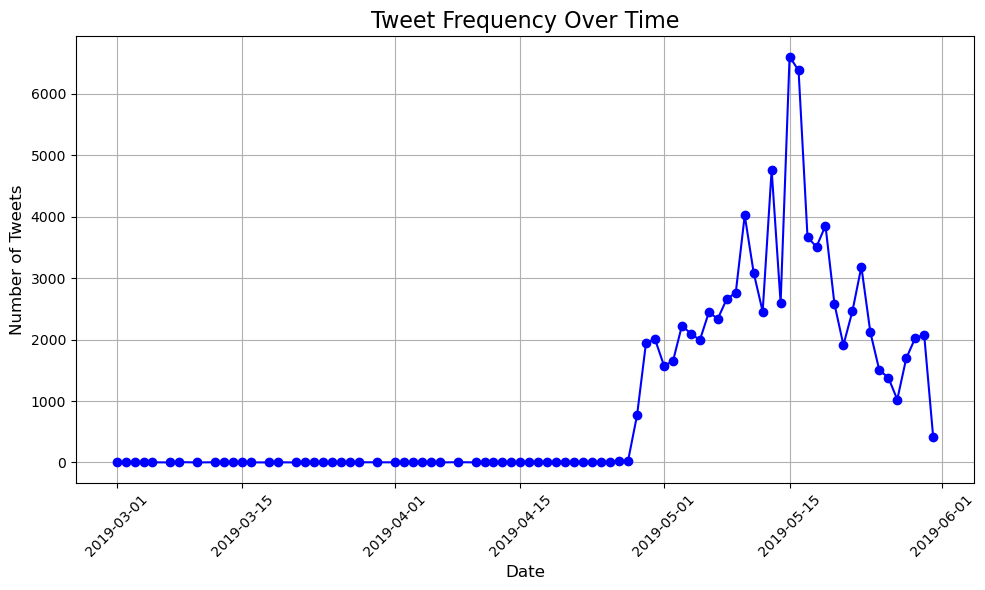

In [76]:
# Group the data by date (day) for a smoother time-based plot
df_cleaned['date'] = df_cleaned['created_at'].dt.date

# Group by the 'date' to count the number of tweets per day
tweet_freq_cleaned = df_cleaned.groupby('date').size()

# Plot the tweet frequency over time (daily)
plt.figure(figsize=(10,6))
plt.plot(tweet_freq_cleaned.index, tweet_freq_cleaned.values, color='b', marker='o', linestyle='-')
plt.title('Tweet Frequency Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [83]:
# Save to a specific path on your local computer
file_path = '/Users/manojkumarsharma/Desktop/potato/cleaned.tsv'
df_cleaned.to_csv(file_path, sep='\t', index=False)
